In [239]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [240]:
X,y = make_blobs(n_samples = 500, centers = 4, random_state=420)

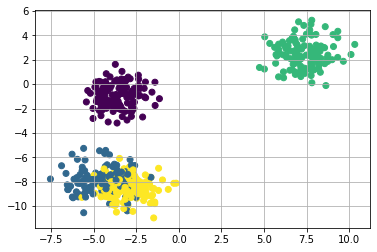

In [241]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1],c=y)

In [262]:
k = 4
color=['Red','Yellow','Green','Blue']
clusters = {}
for i in range(k):
  p_mean = 10*(2*np.random.random((X.shape[1],))-1)
  Xp=[]
  cluster = {
       "p_mean":p_mean,
       "Xp":Xp,
       "colors":color[i]
  }
  clusters[i] = cluster

In [243]:
def euclidian(p1,p2):
  return np.sqrt(np.sum((p1-p2)**2))

In [244]:
def compare(clusters):
  for i in range(X.shape[0]):
    euc_dist = []
    point = X[i]
    for j in range(k):
      dist = euclidian(point,clusters[j]['p_mean'])
      euc_dist.append(dist)
    clstr = np.argmin(euc_dist)
    clusters[clstr]['Xp'].append(point)

In [245]:
def cluster_mean(clusters):
  for i in range(k):
    points = np.array(clusters[i]['Xp'])
    if points.shape[0]>0:
      next_mean = points.mean(axis=0)
      clusters[i]['p_mean'] = next_mean

In [246]:
def plotC(clusters):
  for i in range(k):
    pnts = np.array(clusters[i]['Xp'])
    try:
      plt.scatter(pnts[:,0],pnts[:,1],alpha=0.1,c=clusters[i]['colors'])
    except:
      pass
    c_cluster = clusters[i]['p_mean']
    plt.scatter(c_cluster[0],c_cluster[1],color="black",marker="X")
    clusters[i]['Xp'] = []

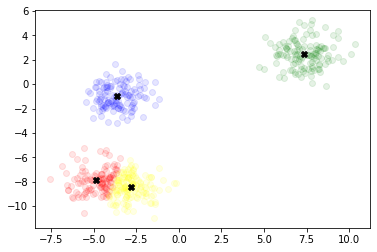

In [266]:
compare(clusters)
cluster_mean(clusters)
plotC(clusters)